In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [2]:
# load all granuloma data as dataframe
file = 'data/processed/TB_sarc_overlap_nodum.csv'
all_df = pd.read_csv(file, index_col=0)
all_df.reset_index(drop=True, inplace=True)
all_df

,SampleID,cellSize,HH3,VIM,SMA,CD4,CD14,Foxp3,CD31,PDL1,...,H3K9Ac,Keratin,MastChyTry,Ta,Au,Tissue,lineage,cell_type,cell_lin,Disease
0,6,0.004213,0.765556,0.786841,0.0,0.660956,0.000000,0.0,0.823676,0.0,...,0.591273,0.000000,0.0,0.014510,0.080456,gran_vert,endothelial,endothelial,nonimmune,0
1,6,0.006156,0.881312,0.726815,0.0,0.308791,0.605867,0.0,0.539543,0.0,...,0.798682,0.000000,0.0,0.068144,0.076104,gran_vert,endothelial,endothelial,nonimmune,0
2,6,0.000684,0.839182,0.795838,0.0,0.564652,0.544975,0.0,0.000000,0.0,...,0.733142,0.000000,0.0,0.000000,0.058582,gran_vert,immune,CD16_CD14_Mono,myeloid,0
3,6,0.001395,0.797691,0.509005,0.0,0.253260,0.070368,0.0,0.000000,0.0,...,0.736855,0.000000,0.0,0.036695,0.069880,gran_vert,immune,CD8_T,lymphocyte,0
4,6,0.010150,0.910139,0.544552,0.0,0.710051,0.373022,0.0,0.012975,0.0,...,0.896432,0.000000,0.0,0.066717,0.087015,gran_vert,immune,CD4_T,lymphocyte,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120836,41,0.006922,0.845022,0.333855,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.651944,0.000000,0.0,0.662771,0.941881,gran_D1MT,immune,imm_other,other,1
120837,41,0.004268,0.904145,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.737777,0.000000,0.0,0.526531,0.951828,gran_D1MT,immune,Mac_Mono,myeloid,1
120838,41,0.002900,0.821165,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.721531,0.000000,0.0,0.591682,0.916732,gran_D1MT,immune,Mac_Mono,myeloid,1
120839,41,0.001149,0.876541,0.000000,0.0,0.000000,0.417564,0.0,0.000000,0.0,...,0.844523,0.000000,0.0,0.579611,0.908306,gran_D1MT,immune,Mac_Mono,myeloid,1


In [3]:
# load granuloma data with overlapping 9 proteins as dataframe
file = 'data/processed/gran_protein9.csv'

gran9_df = pd.read_csv(file, index_col=0)
gran9_df.reset_index(drop=True, inplace=True)
# remove disease label for unbiased PCA
gran9_df = gran9_df.drop(['Disease'], axis='columns')
gran9_df

,P08670,P08571,P16284,P20702,Q86VB7,P11215,P08575,P35908,P46013
0,0.786841,0.000000,0.823676,0.593322,0.0,0.456327,0.449009,0.000000,0.000000
1,0.726815,0.605867,0.539543,0.308015,0.0,0.000000,0.696227,0.000000,0.000000
2,0.795838,0.544975,0.000000,0.578858,0.0,0.000000,0.733090,0.000000,0.000000
3,0.509005,0.070368,0.000000,0.000000,0.0,0.000000,0.712187,0.000000,0.000000
4,0.544552,0.373022,0.012975,0.175431,0.0,0.045592,0.782226,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
120836,0.333855,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
120837,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.199415
120838,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
120839,0.000000,0.417564,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


Variance explained by first two PCA vectors for TB/sarc data with only 9 overlapping proteins: 0.524246607923005


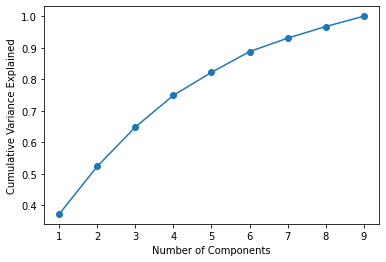

In [4]:
# perform PCA and plot variance over components
n=9
pca = PCA(n_components=n)
data_pca = pca.fit_transform(gran9_df)
ratio = pca.explained_variance_ratio_

print("Variance explained by first two PCA vectors for TB/sarc data with only 9 overlapping proteins:", ratio[0]+ratio[1])

x = range(1,n+1)
y = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure()
plt.plot(x,y, marker='o');
plt.xlabel('Number of Components');
plt.ylabel('Cumulative Variance Explained');
fig.savefig('figures/gran_prot9_cumvar_PCA.png')

In [5]:
# perform PCA with 2 components
pca = PCA(n_components=2)
data_pca = pca.fit_transform(gran9_df)

data_pca_df = pd.DataFrame(data = data_pca, columns = ['PC 1', 'PC 2'])

print(pca.explained_variance_ratio_)

[0.3732263  0.15102031]


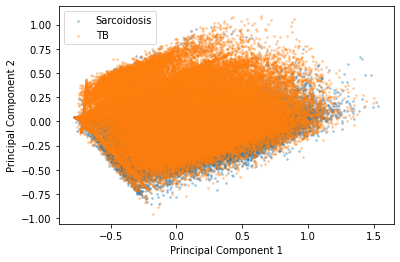

In [6]:
# plot PCA targeting disease
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
targets = [0, 1]
leg = ['Sarcoidosis', 'TB']

# plot each tumor type label in different color
for target in targets:
    ind = all_df['Disease'] == target
    ax.scatter(data_pca_df.loc[ind, 'PC 1']
               , data_pca_df.loc[ind, 'PC 2']
               , alpha=0.3, s=3);
    
ax.legend(leg, loc='best');
fig.savefig('figures/gran_prot9_dis_PCA.png')

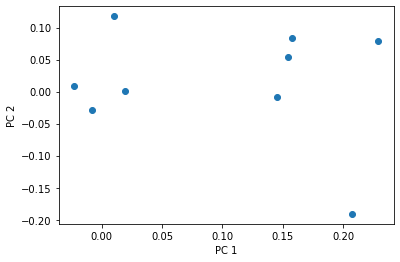

In [7]:
# determine PCA loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
load1 = loadings[:,0]
load2 = loadings[:,1]

# plot loadings for PC1 and PC2
fig = plt.figure()
plt.scatter(load1, load2);
plt.xlabel('PC 1');
plt.ylabel('PC 2');
fig.savefig('figures/gran_prot9_load12.png')

In [8]:
# determine top two features contributing

# find combined contribution to PC1 and PC2 for each feature
comb_weight = []
for i in range(len(gran9_df.columns)):
    comb_weight.append(np.sqrt(load1[i]**2 + load2[i]**2))
    
# find order of indices after sorting from low to high values of combined weight of features
sort_index = np.argsort(comb_weight)
feat1 = gran9_df.columns[sort_index[-1]]
feat2 = gran9_df.columns[sort_index[-2]]
feat3 = gran9_df.columns[sort_index[-3]]
print('Top three features from combined PC1/2 loadings: ' + feat1 + ', ' + feat2 + ', ' + feat3)

sort_index = np.argsort(np.abs(load1))
feat1 = gran9_df.columns[sort_index[-1]]
feat2 = gran9_df.columns[sort_index[-2]]
feat3 = gran9_df.columns[sort_index[-3]]
print('Top three features from PC1 loadings: ' + feat1 + ', ' + feat2 + ', ' + feat3)

sort_index = np.argsort(np.abs(load2))
feat1 = gran9_df.columns[sort_index[-1]]
feat2 = gran9_df.columns[sort_index[-2]]
feat3 = gran9_df.columns[sort_index[-3]]
print('Top three features from PC2 loadings: ' + feat1 + ', ' + feat2 + ', ' + feat3)

Top three features from combined PC1/2 loadings: P08670, P08571, P11215
Top three features from PC1 loadings: P08571, P08670, P11215
Top three features from PC2 loadings: P08670, P46013, P11215
